In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
plt.style.use("custom.mplstyle")
#sns.set(font_scale=0.72)

TEXTWIDTH = 5.6

In [9]:
df_learn = pd.read_csv("../experiments/mnist_le_drop_in_syn/results_data/df_learn_0.csv")
df_runtime = pd.read_csv("../experiments/mnist_le_drop_in_syn/results_data/df_runtime_0.csv")
#df_spikes = pd.read_csv("../experiments/mnist_le_drop_in_syn/df_spikes.csv")

In [10]:
df_learn["Model"] = df_learn["Model"].str.replace("Spike", "Event")
df_runtime["Model"] = df_runtime["Model"].str.replace("Spike", "Event")

df_learn["Model"] = df_learn["Model"].str.replace("Rate", "Continuous")
df_runtime["Model"] = df_runtime["Model"].str.replace("Rate", "Continuous")

df_learn["Method"] = df_learn["Method"].str.replace("Feedback Align", "Exact Feedb.")
df_runtime["Method"] = df_runtime["Method"].str.replace("Feedback Align", "Exact Feedb.")

df_learn["Method"] = df_learn["Method"].str.replace("Random Feedback", "Feedb. Alignment")
df_runtime["Method"] = df_runtime["Method"].str.replace("Random Feedback", "Feedb. Alignment")

df_runtime["Runtime $[s]$"] = df_runtime["Runtime"]

In [14]:
df_learn

,Epoch,Sim ID,Accuracy,Loss,Model,Method
0,0.000000,0,0.097910,0.421072,Event,Feedb. Alignment
1,5.555556,0,0.901075,0.025291,Event,Feedb. Alignment
2,11.111111,0,0.922382,0.015142,Event,Feedb. Alignment
3,16.666667,0,0.934253,0.012297,Event,Feedb. Alignment
4,22.222222,0,0.934355,0.011415,Event,Feedb. Alignment
5,27.777778,0,0.938210,0.011058,Event,Feedb. Alignment
6,33.333333,0,0.938210,0.010903,Event,Feedb. Alignment
7,38.888889,0,0.939631,0.010695,Event,Feedb. Alignment
8,44.444444,0,0.939326,0.010619,Event,Feedb. Alignment
9,50.000000,0,0.939022,0.010696,Event,Feedb. Alignment


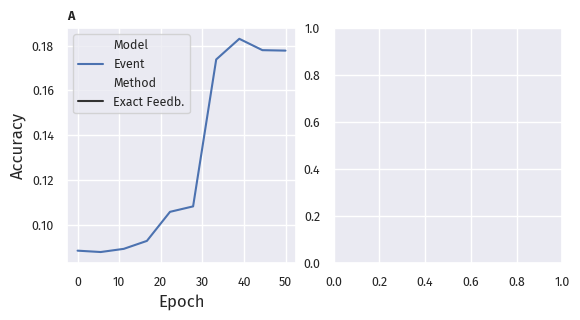

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(TEXTWIDTH,3))

sns.lineplot(df_learn,#[df_learn["Method"] == "Random Feedback"],
             x="Epoch", y="Accuracy", hue="Model", ax=ax[0], style="Method")#, units="Sim ID", estimator=None)
ax[0].legend()

handles, labels = ax[0].get_legend_handles_labels()
#ax[0].legend(handles=[handles[i] for i in [1,2,4,5]], labels=[labels[i] for i in[1,2,4,5]])

#ax[0].set_ylim(bottom=0.3, top=1.025)
ax[0].set_title("A", loc="left", fontweight="bold")

'''
sns.barplot(data=df_runtime, x="Method",
            hue="Model", y="Runtime $[s]$", ax=ax[1])
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles=handles, labels=labels)
ax[1].set_title("B", loc="left", fontweight="bold")

ax[1].set_ylim(top=2700.)
'''

fig.tight_layout(pad=0.0, w_pad=0.6)

#fig.savefig("mnist_analysis.png", dpi=500)
fig.savefig("mnist_analysis.pdf", bbox_inches="tight")
plt.show()

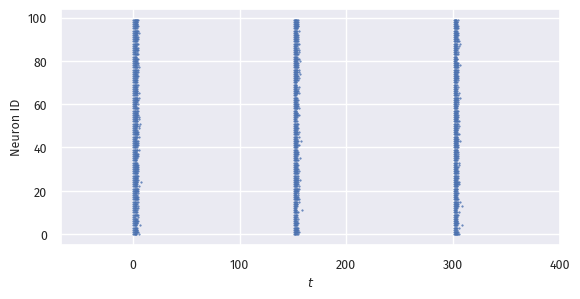

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH, TEXTWIDTH * 0.5))

ax.plot(df_spikes["t"], df_spikes["id"], '.', markersize=1)

ax.set_xlim(right=400.)

ax.set_xlabel("$t$")
ax.set_ylabel("Neuron ID")

fig.tight_layout(pad=0.0)

fig.savefig("mnist_spikes.pdf", bbox_inches="tight")

plt.show()